## Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

## Глава 3 Текст и шрифты

### Содержание главы

1. Файл настройки matplotlibrc;

2. Текст на рисунке;

3. Наборы шрифтов. Стили и форматы;

4. Кириллица и matplotlib. Подписи по-русски;

5. Работа с математическими формулами. Поддержка LaTex.

Текст является одним из базовых графических элементов рисунка в matplotlib. Подписи координатных осей и их делений, заголовки, пояснительные подписи на графиках и диаграммах - это всё текст. В Matplotlib возможна поддержка кириллицы для создания научной графики с подписями на русском языке. Одним из весомых преимуществ matplotlib при работе с текстом является простая поддержка математических формул с помощью LaTex. 

### Электронные ресурсы:

+ [Инструкция по конфигурации файла настройки matplotlibrc](http://matplotlib.org/users/customizing.html);

+ [Об особенностях использования LaTeX в matplotlib](http://matplotlib.org/users/usetex.html);

+ [О работе с текстом в matplotlib](http://matplotlib.org/users/text_intro.html);

+ [О свойствах текста](http://matplotlib.org/users/text_props.html).

In [19]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

### 3.1 Файл настройки `matplotlibrc`

В matplotlib существует файл настройки в котором хранятся значения по умолчанию для разных свойств графических элементов. Он называется `matplotlibrc`. Он инициализируется при каждой загрузке модуля matplotlib. Изменив содержание файла `matplotlibrc` можно сохранить пользовательские настройки для работы при следующих загрузках модуля matplotlib. Чтобы узнать какой именно файл настройки используется при инициализации, можно воспользоваться специальной функцией `matplotlib.matplotlib_fname()`.

Для работы с настройками в интерактивном режиме, то есть из консоли или в скрипте, существует `matplotlib.rcParams`. C помощью `matplotlib.rcParams` можно, во-первых, установить все параметры рисования (шрифты, толшина/тип линий, оформление рамок) на необходимые значения, а во-вторых, увидеть, собственно, список настроек, то есть список того, что можно изменить.

In [20]:
import matplotlib as mpl

print mpl.matplotlib_fname() # показывает откуда был загружен текуший файл matplotlibrc

mpl.rcParams # показывает текущие настройки

# mpl.rcParamsDefault # показывает значения параметров, которые хранятся в файле matplotlibrc

# mpl.rcdefaults() сбрасывает значения на те, которые хранятся в файле matplotlibrc

C:\Users\pasha\Anaconda2\lib\site-packages\matplotlib\mpl-data\matplotlibrc


RcParams({u'_internal.classic_mode': False,
          u'agg.path.chunksize': 0,
          u'animation.avconv_args': [],
          u'animation.avconv_path': u'avconv',
          u'animation.bitrate': -1,
          u'animation.codec': u'h264',
          u'animation.convert_args': [],
          u'animation.convert_path': u'convert',
          u'animation.ffmpeg_args': [],
          u'animation.ffmpeg_path': u'ffmpeg',
          u'animation.frame_format': u'png',
          u'animation.html': u'none',
          u'animation.mencoder_args': [],
          u'animation.mencoder_path': u'mencoder',
          u'animation.writer': u'ffmpeg',
          u'axes.autolimit_mode': u'data',
          u'axes.axisbelow': u'line',
          u'axes.edgecolor': u'k',
          u'axes.facecolor': u'w',
          u'axes.formatter.limits': [-7, 7],
          u'axes.formatter.offset_threshold': 4,
          u'axes.formatter.use_locale': False,
          u'axes.formatter.use_mathtext': False,
          u'axes.forma

### 3.2 Текст на рисунке

Одними из самых базовых графических команд являются команды, отображающие текст. Самой простой такой командой, не привязаной к какому-либо объекту вроде координатной оси или делений координатной оси, является команда `plt.text()`. 

В качестве входящих данных она принимает координаты положения будующей строки и сам текст в виде строки. По умолчанию координаты положения строки будут приурочены к области изменения данных. Можно задать положение текста в относительных координатах (см. пример ниже), когда вся область рисования изменяется по обеим координатным осям от 0 до 1 включительно. Таким образом, координата (0.5, 0.5) в относительных координатах означает центр области рисования. Текст можно выровнять с помощью параметров horizontalalignment и verticalalignment, а также заключать его в рамку с цветным фоном, передав параметр bbox. Bbox - это словарь, работающий со свойствами прямоугольника, то есть объектом Rectangle.

Помимо метода text() существуют и другие методы отображения текста в pyplot. Ниже представлен список текстовых команд в pyplot, в квадратных скобках указан альтернативный синтаксис вызова аналогичных команд в ООП стиле. Подробнее об ООП стиле будет рассказано позже.

+ `plt.xlabel()` - добавляет подпись оси абсции OX `[matplotlib.axes.Axes.set_xlabel()]`;

+ `plt.ylabel()` - добавляет подпись оси ординат OY `[matplotlib.axes.Axes.set_ylabel()]`;

+ `plt.title()` - добавляет заголовок для области рисования Axes `[matplotlib.axes.Axes.set_title()]`;

+ `plt.figtext()` - добавляет текст на рисунок Figure `[matplotlib.figure.Figure.text()]`;

+ `plt.suptitle()` - добавляет заголовок для рисунка Figure `[matplotlib.figure.Figure.suptitle()]`;

+ `plt.annotate()` - добавляет примечание, которое состоит из текста и необязательной стрелки в указанную область на рисунке `[matplotlib.axes.Axes.annotate()]`

Каждый текст на рисунке - это экземпляр либо исходного класса, либо дочернего класса для `matplotlib.text.Text`.

Text class: <class 'matplotlib.text.Text'>


WindowsError: [Error 3] : './pictures/png'

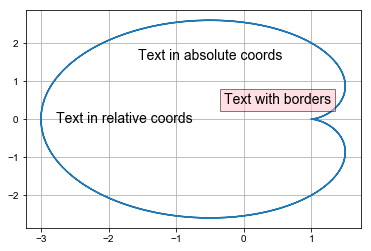

In [21]:
# Пример 3.2

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

a = 1.
x = np.arange(-2*np.pi, 2*np.pi, 0.05)
# Уравнение кардиоиды
xz = a*(2*np.cos(x) - np.cos(2*x))
yz = a*(2*np.sin(x) - np.sin(2*x))

fig = plt.figure()
plt.plot(xz, yz)

# Текст в координатах данных
str1 = plt.text(-np.pi/2., np.pi/2., 'Text in absolute coords', fontsize=14)   # выравнивание по левому краю
print('Text class: %s' % str1.__class__)

# Текст в рамке
plt.text(0.5, 0.5, 'Text with borders', fontsize=14,
         # выравнивание по вертикали и по горизонтали по центру
         horizontalalignment='center', verticalalignment='center',
         bbox=dict(facecolor='pink', alpha=0.5))

# Текст в относительных координатах области рисования ax
ax = fig.add_subplot(111)   # создаём область рисования ax
plt.text(0.5, 0.5, 'Text in relative coords', fontsize=14,
         horizontalalignment='right', verticalalignment='center',
         transform=ax.transAxes)
plt.grid()

save('pic_3_2', fmt='png')
save('pic_3_2', fmt='pdf')

plt.show()

### 3.3 Наборы шрифтов. Стили и форматы

Из настроек `matplotlibrc` или `rcParams` нас интересуют fonts, то есть шрифты. Есть 5 наборов шрифтов: 

+ cursive;

+ fantasy;

+ monospace;

+ sans-serif;

+ serif. 

Один из этих пяти наборов является текущим. За это отвечает параметр font.family. Каждый набор может состоять из одного или более шрифтов. Причём можно указывать шрифты, которые не установлены в ОС. Работать такие шрифты не будут, но формально указать их можно. Такая настройка определяет шрифт для всех подписей и текста на рисунке. Если конкретную подпись необходимо сделать другим шрифтом, можно указать шрифт из текущего стиля прямо в команде, передав в качестве соответствующего параметра словарь: `{'fontname':'название_шрифта'}`.

Помимо семейств, текст также может иметь стиль. Атрибут стиля style может быть либо 'italic', либо 'oblique', либо 'normal' (по умолчанию). Толщина или "жирность" шрифта, может быть задана через атрибут fontweight, который принимает значения 'bold', 'light' или 'normal' (по умолчанию). Стили и форматы можно комбинировать.

In [ ]:
# Пример 3.3

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.fantasy'] = 'Arial', 'Times New Roman', 'Tahoma', 'Comic Sans MS', 'Courier'
mpl.rcParams['font.family'] = 'fantasy'

# Текущий стиль-семейство шрифтов
cfam = mpl.rcParams.get('font.family')[0]
print('cfam %s' % cfam)
cfont = mpl.rcParams.get('font.fantasy')[0]

# Первый шрифт в текущем семействе
print(mpl.rcParams.get('font.%s' % cfam))


N = 100
x = np.arange(N)
# Задаём выборку из Гамма-распредления с параметрами формы=1. и масштаба=3.0
y = np.random.gamma(1.0, 3.0, N)

fig = plt.figure()
cc = plt.hist(y) 

text_style = ['italic', 'oblique', 'normal']
font_weights = ['bold', 'light', 'normal']
for i, ts in enumerate(text_style):
    plt.text(6, 20-5*i, '%s text style' % ts, {'fontname':'Courier'}, style=ts, fontsize=14)
    plt.text(6, 35-4*i, '%s & %s text style' % (ts, font_weights[i]), {'fontname':'Courier'}, 
             style=ts, fontweight=font_weights[i], fontsize=12)
    
plt.title('Title has %s font' % cfont, fontweight='normal', color='k', fontsize=16)
plt.xlabel('Bold weight', {'fontname':'Times New Roman'}, fontweight='bold', fontsize=16)
plt.ylabel('Light weight', {'fontname':'Times New Roman'}, fontweight='light', fontsize=14)
plt.grid(True)

save('pic_3_3', fmt='png')
save('pic_3_3', fmt='pdf')

plt.show()

### 3.4 Кириллица и matplotlib. Подписи по-русски

Кириллица "из коробки" не поддерживается в matplotlib. Однако настроить поддержку русского алфавита несложно. Основная проблема matplotlib для отображения кириллических символов состоит в том, что по умолчанию используются шрифты, которые не поддерживают кириллицу. Соответственно, решение проблемы отображения русского алфавита заключается в смене шрифта на тот, который поддерживает кириллицу. В ОС Windows это может быть, например, Arial, Times New Roman или Tahoma. Сделать это можно как в теле самой программы-скрипта, так и в профильных настройках.

У каждого стиля шрифта определены списки из реальных шрифтов, которыми пользуются в текстовых процессорах и редакторах. Чтобы поставить шрифт, который будет корректно отображать кириллицу, можно воспользоваться таким примером:

In [ ]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Arial', 'Times New Roman', 'Tahoma'

Таким образом, набор fantasy будет основным, и из него будет использован шрифт Arial. Если он не будет найден, то будет выбран второй по списку и так далее. Оба представленных шрифта корректно отображают кирилличекие символы.

Можно использовать и такой синтаксис:

In [ ]:
# Пример 3.4.1

from matplotlib import rc
 
font = {'family': 'Courier New',
        'weight': 'normal'}
rc('font', **font)

cfam = mpl.rcParams.get('font.family')[0]
print cfam
cfont = mpl.rcParams.get('font.fantasy')[0]
print cfont

plt.text(0.25, 0.45, u'Стиль %s по умолчанию' % cfam)
plt.text(0.25, 0.25, u'Шрифт Arial', {'fontname':'Arial'})

plt.xlabel(u'Ось абсцисс', {'fontname':'Arial'})
plt.ylabel(u'Ось ординат', {'fontname':'Times New Roman'})
plt.title(u'Заголовок и буква Ё! А также разные шрифты элементов рисунка',{'fontname':'Tahoma'})
plt.grid()

save('pic_3_4_1', fmt='png')
save('pic_3_4_1', fmt='pdf')

plt.show()

Список доступных в ОС шрифтов можно узнать, например, вот так:

In [ ]:
import matplotlib.font_manager as fm
for i, font in enumerate(sorted(fm.findSystemFonts())):
    # Шрифтов в системе очень много. Полный список занимает не одну страницу A4
    if(i % 50 == 0):
        print i, font

Для поиска по названию известного вам шрифта в ОС можно воспользоваться функцией findfont:

In [ ]:
import matplotlib.font_manager as fm
print 'Courier New - %s' % fm.findfont('Courier New') # Ищем Courier New
print 'Times New Roman - %s' % fm.findfont('times new roman') # Ищем times new roman строчными буквами
print 'Comic Sans MS - %s' % fm.findfont('COMIC SANS MS') # Ищем COMIC SANS MS прописными буквами

**Вторым необходимым условием** для отображения на рисунках matplotlib русских букв является использование unicode-строк. В python3 все строки являются юникодовыми, там дополнительных примочек не нужно. В python2 необходимо преобразовывать обычную строку в юникод-строку: 

In [ ]:
str1 = 'строка 1' # обычная строка
print str1,type(str1)
str2 = u'строка 1' # unicode-строка
print str2,type(str2)

Также ставим в начале скрипта: # -*- coding: utf-8 -*- . В GUI Spyder такая запись вставляется в новый созданный скрипт по умолчанию.

In [ ]:
# -*- coding: utf-8 -*-
# Пример 3.4.2

from math import pi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#mpl.rcdefaults() # cбрасываем настройки на "по умолчанию"
mpl.rcParams['font.family'] = 'fantasy'
mpl.rcParams['font.fantasy'] = 'Times New Roman', 'Ubuntu','Arial','Tahoma','Calibri'

x = np.arange(-pi,pi+0.1,0.1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
y = np.tanh(x)
y2 = np.arctan(x)
ax1.plot(x,y,'k--',label=u'Гиперболический тангенс')
ax1.plot(x,y2,'b',label=u'Арктангенс')

st = u'Заголовок по-русски'
sy = u'Ось ординат OY по-русски'
sx = u'Ось абсцисс OX по-русски'

ax1.set_title(st,size=20,color='green')
ax1.set_xlabel(sx,size=14,color='orange')
ax1.set_ylabel(sy,size=12, color='black')
ax1.grid(True)
ax1.legend(loc='best',frameon=False)

plt.tight_layout() # автоматическое выравнивание элементов на холсте plt

save('pic_3_4_2', fmt='png')
save('pic_3_4_2', fmt='pdf')

plt.show()

### 3.5 Работа с математическими формулами. Поддержка LaTex

> **Для работы с LaTex необходимо установить его дистрибутив! Создатели iPython Notebooks советуют [использовать MikTex](http://miktex.org/download)**

Существенным преимуществом matplotlib является безбарьерная работа с LaTex. Нужно, чтобы в системе был установлена библиотека LaTeX (именно библиотека, а не редактор). Код LaTex оформляется в виде "raw" строки (перед строкой ставится символ r -> `r'строка')`. Также в настройках pyplot нужно указать, чтобы текст отрисовывался с учётом синтаксиса LaTeX. Это можно сделать через `plt.rc('text', usetex=True)`.

In [ ]:
# Пример 3.5

import matplotlib.pyplot as plt
import numpy as np

# Преамблуа для работы с LaTeX
plt.rc('text', usetex=True)

N = 100
x = np.arange(N)
z1 = np.cos(x/10.)
z2 = np.cos(x/20.)

fig = plt.figure()
plt.fill_between(x, z2, z1, color='green', alpha=0.25) 
plt.plot(x, z1, color='green', linewidth=4.0)
plt.plot(x, z2, color='green', linewidth=4.0, alpha=0.5)
plt.title(r'$\S1.3.2 \LaTeX example$')
plt.text(22, 0.5, r'$ e=mc^2 $', fontsize='16')
plt.text(55, -0.5, r'$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!', fontsize=18, rotation=60)

plt.grid(True)
plt.xlabel(r'\textbf{Time (s)}')
plt.ylabel(r'\textit{Sin(x) \& cos(x)}', color='red', rotation=45)

save('pic_3_5', fmt='png')
save('pic_3_5', fmt='pdf')

plt.show()

Для корректного отображения не латеховского кода, нужно не забыть отключить его поддержку, если элементы LaTeX использовались для создания рисунка.

In [ ]:
plt.rc('text', usetex=False)

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

> + [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)